In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [33]:
df=pd.read_csv(r'C:\Users\hp\Downloads\Employee attrition\general_data.csv')
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [37]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [38]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [39]:
df['Gender']=df['Gender'].replace({'Female':1,'Male':0})
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,0,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,0,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,0,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,1,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,0,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,0,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,0,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,1,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int64  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [41]:
obj_cols=['Attrition','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18']
encode=LabelEncoder()
for i in obj_cols:
    df[i]=encode.fit_transform(df[i])
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,1,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,0,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,0,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,0,...,4.0,0,12,8,2,9.0,2,6,0,4
5,46,0,2,1,8,3,1,1,6,1,...,3.0,0,13,8,0,28.0,5,7,7,7
6,28,1,2,1,11,2,3,1,7,0,...,2.0,0,20,8,1,5.0,2,0,0,0
7,29,0,2,1,18,3,1,1,8,0,...,2.0,0,22,8,3,10.0,2,0,0,0
8,31,0,2,1,1,3,1,1,9,0,...,0.0,0,21,8,0,10.0,2,9,7,8
9,25,0,0,1,7,4,3,1,10,1,...,1.0,0,13,8,1,6.0,2,6,1,5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int64  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int32  
 12  MaritalStatus            4410 non-null   int32  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [43]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [46]:
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(),inplace=True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(),inplace=True)

In [47]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [48]:
x=df.drop(columns=['Attrition'],axis=1)
y=df['Attrition']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35,stratify=y)

In [50]:
df.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int32
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [57]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [58]:
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=10)
rfe=rfe.fit(x_train,y_train)

In [61]:
print(f"Selected features: {x.columns[rfe.support_]}")

Selected features: Index(['Age', 'Department', 'EducationField', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [62]:
model.fit(x_train[:,rfe.support_],y_train)

LogisticRegression()

In [63]:
y_pred=model.predict(x_test[:,rfe.support_])
y_pred_prob=model.predict_proba(x_test[:,rfe.support_])[:,1]

In [64]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1109    1]
 [ 202   11]]


In [65]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1110
           1       0.92      0.05      0.10       213

    accuracy                           0.85      1323
   macro avg       0.88      0.53      0.51      1323
weighted avg       0.86      0.85      0.78      1323



In [68]:
roc_auc = roc_auc_score(y_test,y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.7219599881571712


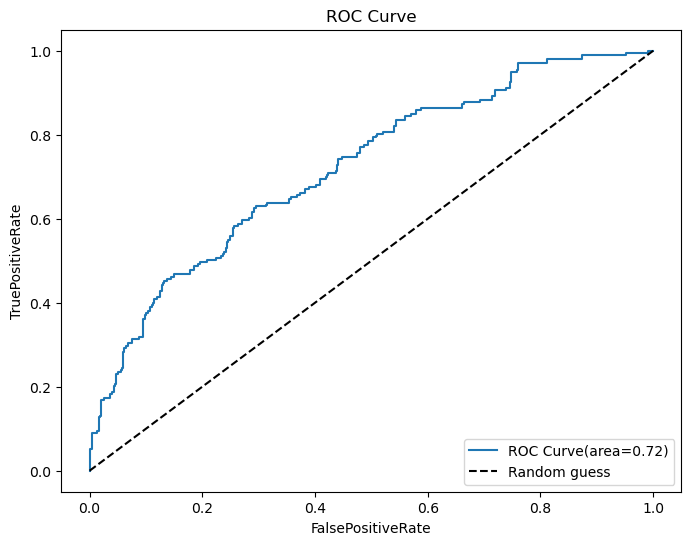

In [70]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'ROC Curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--',label='Random guess')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [72]:
coeff= pd.DataFrame(model.coef_[0],x.columns[rfe.support_],columns=['Coefficient'])
print(coeff)

                         Coefficient
Age                        -0.291179
Department                 -0.138780
EducationField             -0.107650
MaritalStatus               0.407166
MonthlyIncome              -0.096166
NumCompaniesWorked          0.306771
TotalWorkingYears          -0.380508
TrainingTimesLastYear      -0.131044
YearsSinceLastPromotion     0.514141
YearsWithCurrManager       -0.528030
